In [4]:
import json
import numpy as np

# Load the JSON file
with open('../characters_with_embeddings.json', 'r') as f:
    characters = json.load(f)

# Extract names and embeddings
names = [char['name'] for char in characters]
embeddings = np.array([char['embedding'] for char in characters])

Matplotlib is building the font cache; this may take a moment.


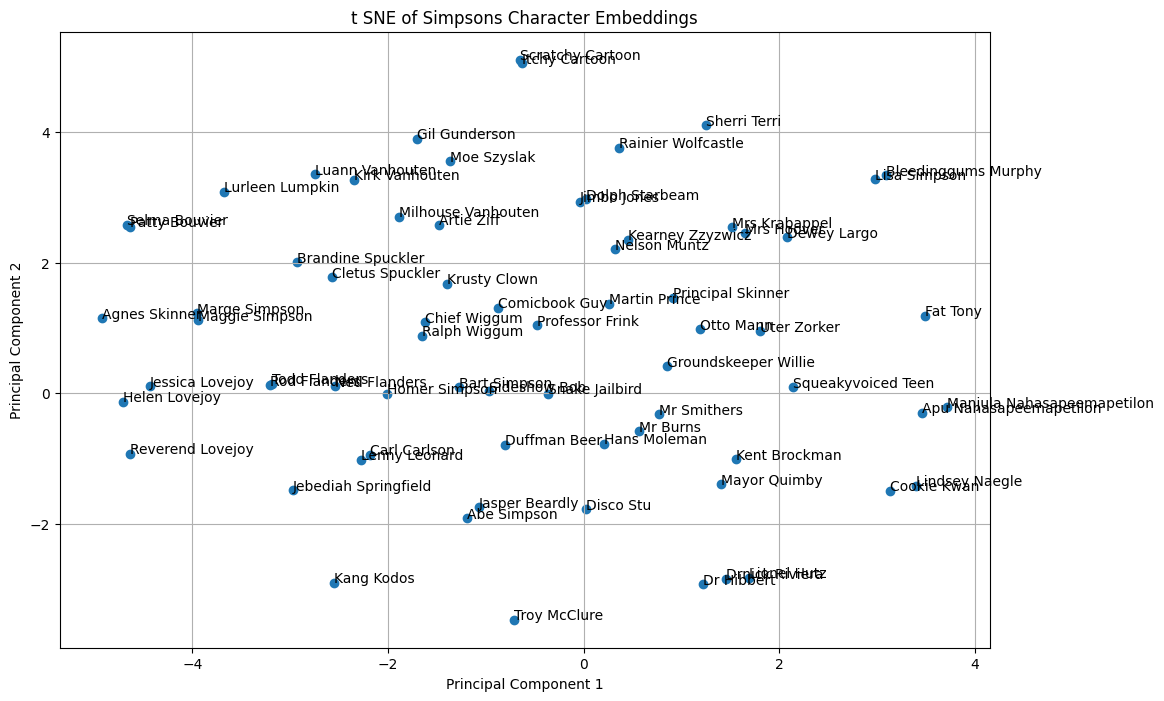

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d_tsne = tsne.fit_transform(embeddings)

# Plot the 2D embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1], marker='o')

names = names

# Annotate each point with the character name
for i, name in enumerate(names):
    plt.annotate(name, (embeddings_2d_tsne[i, 0], embeddings_2d_tsne[i, 1]))

plt.title('t SNE of Simpsons Character Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

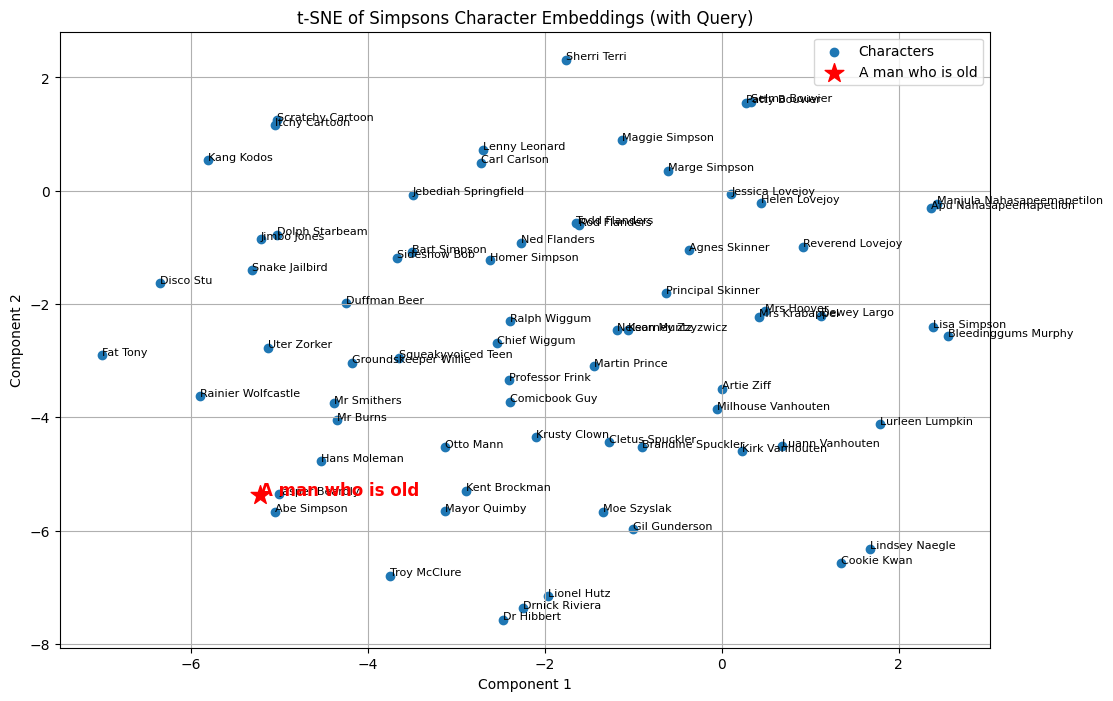

In [10]:
import ollama

# 1. Hardcoded query string
#query = "A mischievous boy who loves skateboarding and pranks"
query = "A man who is old"

# 2. Embed the query string (same as in makeSimpsonsEmbed.py)
def embed_text(text):
    return ollama.embeddings(model='mxbai-embed-large', prompt=text)['embedding']

query_embedding = np.array(embed_text(query))

# 3. Transform the query embedding using the same t-SNE model
# Note: t-SNE does not support transforming new points after fitting.
# So, we need to re-fit t-SNE with the new point included.

# Stack the query embedding with the original embeddings
all_embeddings = np.vstack([embeddings, query_embedding])

# Re-run t-SNE
tsne = TSNE(n_components=2, random_state=42)
all_embeddings_2d = tsne.fit_transform(all_embeddings)

# Split out the results
embeddings_2d_tsne = all_embeddings_2d[:-1]
query_2d_tsne = all_embeddings_2d[-1]

# 4. Plot
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1], marker='o', label='Characters')
plt.scatter(query_2d_tsne[0], query_2d_tsne[1], color='red', marker='*', s=200, label=query)

# Annotate each point with the character name
for i, name in enumerate(names):
    plt.annotate(name, (embeddings_2d_tsne[i, 0], embeddings_2d_tsne[i, 1]), fontsize=8)

plt.annotate(query, (query_2d_tsne[0], query_2d_tsne[1]), fontsize=12, color='red', weight='bold')

plt.title('t-SNE of Simpsons Character Embeddings (with Query)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
import sys
print("Python executable in use:", sys.executable)

Python executable in use: /Users/jakesimonds/Documents/LatentHomer/venv/bin/python
